## Analise dos dados dos passageiros do Titanic
Vou investigar a quantidade total (Percentual de sobreviventes)
A média de idade dos passageiros
Qual o passageiro mais novo assim como o mais velho e o desvio padrão
Sobreviventes por idade
Sobreviventes por classe social 
Sobreviventes por sexo


In [153]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Parametros das legendas

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#carrega dados
titanic_df = pd.read_csv('titanic_data.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
#contagem de registros unicos
len(titanic_df['PassengerId'].unique())

891

In [3]:
#verifica campos inexistentes
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [260]:
#removendo nulos da idade
titanic_df.dropna(subset=['Age'], inplace=True)

In [261]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [262]:
#checando nulos 
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
#qtde de sobreviventes

sobreviventes = titanic_df['Survived'].sum()
total = titanic_df['Survived'].count()

# % de sobreviventes sobre o total de passsageiros

percent_sur = (float(sobreviventes)/float(total)*100)

# Total de sobreviventes
print sobreviventes
# Total de passageiros
print total
#PErcentual de sobreviventes
print percent_sur

342
891
38.3838383838


In [71]:
#pandas séries - informacoes de idade
hist_idade.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## histograma idades dos passageiros
É possível verificar que  grupo de idade com maior número de passageiros, está entre 15 e 25 anos,porém, o maior grupo de sobreviventes está entre 25 e 30 anos.

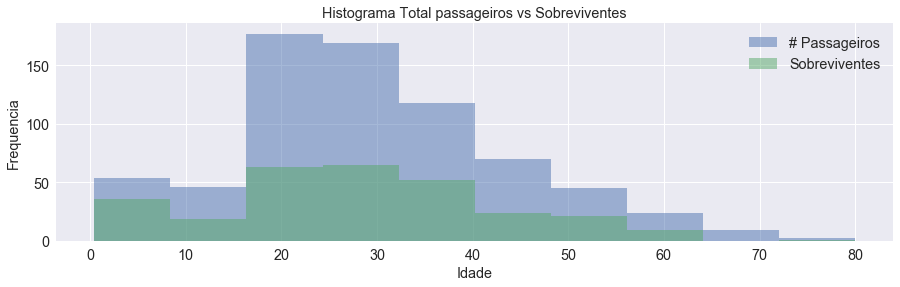

In [167]:
hist_idade = pd.Series(titanic_df['Age'])
#sobreviventes por idade
df_hist = pd.DataFrame({'Age' : titanic_df['Age'], 'Survived' : titanic_df['Survived']})
#ilimina os casos de óbito
sbr_idade = df_hist[df_hist['Survived']!=0]
#Data frame agrupando sobreviventes e total de passageiros
df4 = pd.DataFrame({'# Passageiros':df_hist['Age'],'Sobreviventes':sbr_idade['Age']})
ax = df4.plot.hist(alpha=0.5)
ax.set(title=r'Histograma Total passageiros vs Sobreviventes',xlabel='Idade',ylabel='Frequencia')

Gráfico de caixa para facilitar a analise de maximo minimo e média do total de passageiros e sobreviventes

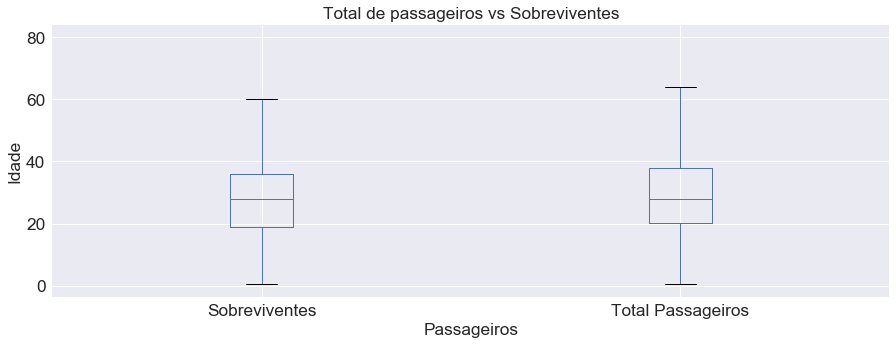

In [135]:
#Gráfico de caixa para facilitar a analise de maximo minimo e média do total de passageiros e sobreviventes
df4 = pd.DataFrame({'Sobreviventes':sbr_idade['Age'],'Total Passageiros':df_hist['Age']})
ax = df4.boxplot()
ax.set(title=r'Total de passageiros vs Sobreviventes',xlabel='Passageiros',ylabel='Idade')

Percentual de sobreviventes por gênero (68% de mulheres contra 32% de homens)

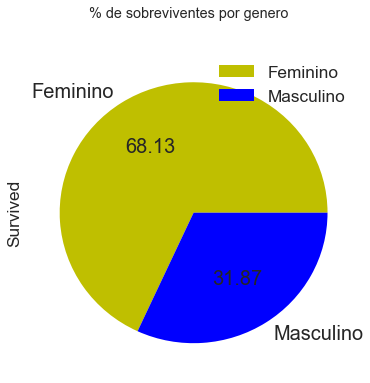

In [136]:

genero = pd.DataFrame(titanic_df.groupby(['Sex'])[['Survived']].sum())
ax = genero.plot.pie(title=r'% de sobreviventes por genero',labels=['Feminino', 'Masculino'], colors=['y', 'b'],
                autopct='%.2f', fontsize=20,subplots=True, figsize=(6, 6))



## Quantidade de passageiros por classe
As analises abaixo representam as comparações entre classes e gêneros dos passageiros.

        Survived
Pclass          
1            216
2            184
3            491


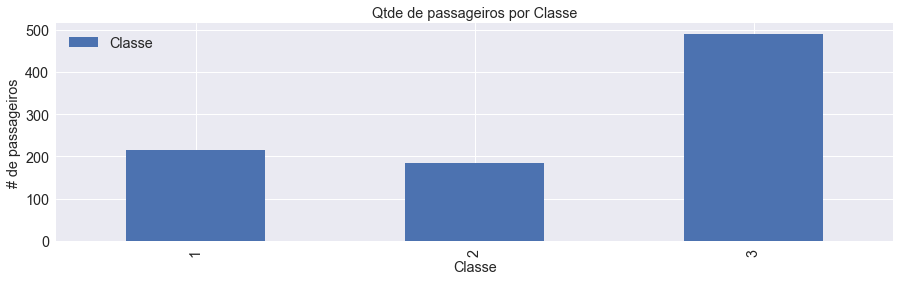

In [158]:
total_classe = titanic_df.groupby(['Pclass'])[['Survived']].count()
surv = titanic_df.groupby(['Pclass'])[['Survived']].sum()
print total_classe
ax = total_classe.plot.bar()
ax.set(title=r'Qtde de passageiros por Classe',xlabel='Classe',ylabel='# de passageiros')
ax.legend(['Classe'])


## Média de idade por Classe

In [25]:
media_class = titanic_df.groupby('Pclass').mean()['Age']

print media_class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


## Sobreviventes agrupados por classe
De acordo com a analise, é possível notar que o grupo da primeira e terceira classe, foram os que mais sobreviveram ao acidente.

# Sobreviventes por classe agrupados por gênero
Nota-se que o número de mulheres que sobreviveram foi de quase 68% do total.
As mulheres foram a maioria de sobreviventes em todas as classes, o interessante é que o numero de sobreviventes de primeira classe foi maior tanto para mulheres quanto homens, mas 96% das mulheres da primeira classe sobreviveram contra 46% da terceira, já para os homens, 49% da primeira classe sobreiveram contra 15% da segunda e 15% da terceira

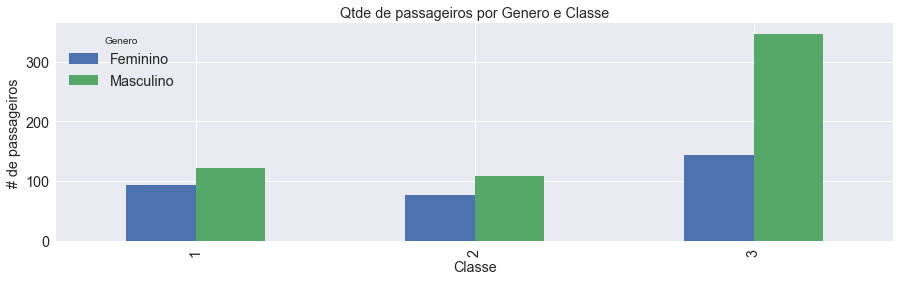

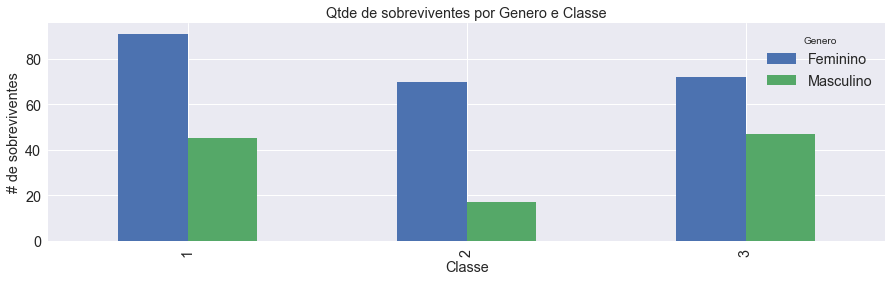

In [161]:


# Total de passageiros por genêro e classe
total_classe = titanic_df.groupby(['Pclass','Sex'])[['Pclass']].size().unstack()

ax = total_classe.plot.bar()
ax.set(title=r'Qtde de passageiros por Genero e Classe',xlabel='Classe',ylabel='# de passageiros')
ax.legend(['Feminino','Masculino'],title='Genero')

# Total de sobreviventes por genêro e classe
surv_2 = titanic_df.groupby(['Pclass','Sex'])[['Survived']].sum().unstack()
ax_1 = surv_2.plot.bar()
ax_1.set(title=r'Qtde de sobreviventes por Genero e Classe',xlabel='Classe',ylabel='# de sobreviventes')
ax_1.legend(['Feminino','Masculino'],title='Genero')




## Abaixo temos duas analises que comparam os sobreviventes por classe e gênero
A proporção de sobreviventes homens da segunda classe é baixa se comparada ao total de homens que sobreviveram, porém, ao avaliar a qtde total de passageiros notamos que o número de passageiros da segunda classe é bem menor do que os da primeira e terceira classe.

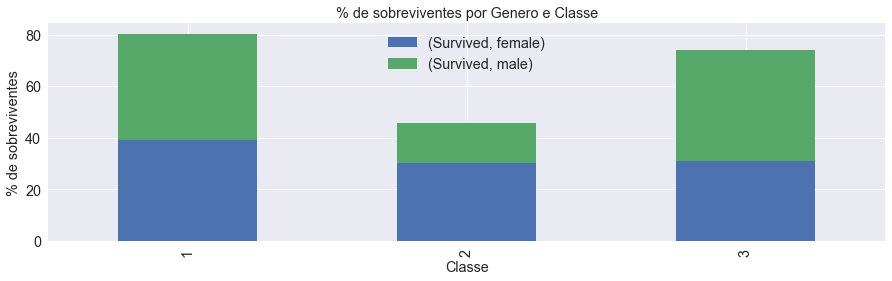

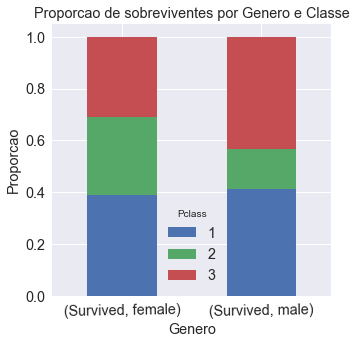

In [256]:
# Total de sobreviventes por genêro e classe
surv_2 = titanic_df.groupby(['Pclass','Sex'])[['Survived']].sum().unstack()
percent_surv = (surv_2.div(surv_2.sum()))*100
ax = percent_surv.plot.bar(stacked=True,legend=False)
ax = ax.set(title=r'% de sobreviventes por Genero e Classe',xlabel='Classe',ylabel='% de sobreviventes')
plt.xlabel('Classe')
plt.legend(markerscale=0)

sub_df3 = surv_2.unstack().T
sub_df3 = surv_2.div(surv_2.sum())
sub_df3.T.plot(kind='bar', stacked=True, rot=1, figsize=(5, 5),
               title='Proporcao de sobreviventes por Genero e Classe')

plt.ylabel('Proporcao')
plt.xlabel('Genero')




## Conclusão

Podemos notar de acordo com as analises que o grupo feminino foi o que mais se salvou, notamos também que a primeira classe foi a que mais teve sobreviventes, outro ponto interessante do estudo é que a segunda classe e terceira classe tiveram quase o mesmo percentual de sobreviventes quando falamos do gênero masculino.

Passageiros com idades entre 25 e 30 anos foram os que mais se salvaram, importante verificar é que houve um outlier com idade de 80 anos que também se salvou, segundo a amostra.

A dificuldade em se analisar a amostra foi de que, para a analise de idades por exemplo, haviam passageiros com idade nula atrapalhando assim a média entre outros calculos. Outros campos também possuiam sujeiras e itens vazios.

Um outro detalhe é que a base trata-se de uma amostragem o número de passageiros do titanic era mais de 2400, por isso, nao é possivel validar com axatidão as analises publicadas nesse documento.